# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

In Step 0 I've loaded the data from the traffic_signs_data file, broken it into the three parts and examined the size and shape of the files.



---
## Step 0: Load The Data

In [21]:
# Load pickled data
import pickle
import numpy as np
# TODO: Fill this in based on where you saved the training and testing data

training_file = "traffic-signs-data/train.p"
validation_file="traffic-signs-data/valid.p"
testing_file = "traffic-signs-data/test.p"

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
    
X_train, Y_train = train['features'], train['labels']
X_valid, Y_valid = valid['features'], valid['labels']
X_test, Y_test = test['features'], test['labels']



assert(len(X_train) == len(Y_train))
assert(len(X_valid) == len(Y_valid))
assert(len(X_test) == len(Y_test))

print("X_train.shape : ", X_train.shape)
print("X_test.shape : ", X_test.shape)
print("y_test.shape : ", Y_test.shape)
print("X_valid.shape : ",X_valid.shape)


X_train.shape :  (34799, 32, 32, 3)
X_test.shape :  (12630, 32, 32, 3)
y_test.shape :  (12630,)
X_valid.shape :  (4410, 32, 32, 3)


---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

1.In Step 1 I've used python and numpy to create a data summary. There are 34799 training examples, 12630 testing examples, and all examples are (32,32,3).


### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

Number of training examples = 34799
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43



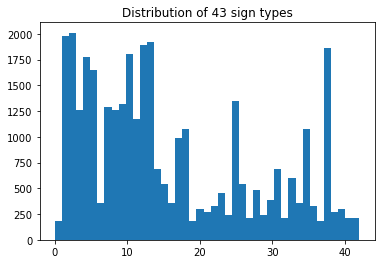

In [22]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results
import csv
import numpy as np
import matplotlib.pyplot as plt 


# TODO: Number of training examples
n_train = X_train.shape[0]

# TODO: Number of testing examples.
n_test = X_test.shape[0]

# TODO: What's the shape of an traffic sign image?
image_shape = (X_train.shape[1], X_train.shape[2], X_train.shape[3])

# TODO: How many unique classes/labels there are in the dataset.
n_classes = len(set(Y_train))

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)
print()

plt.hist(Y_train, bins=43)
plt.title("Distribution of 43 sign types")
plt.show()


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc.

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections.

2.I've explored using several python tools to display the data. Matplotlib's subplot works best, subplot2grid's arguments are odd. I've also broken out the 43 individual labels with an example of each.

image shape =  (32, 32, 3)
b.shape = (32, 32)


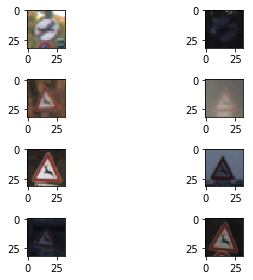

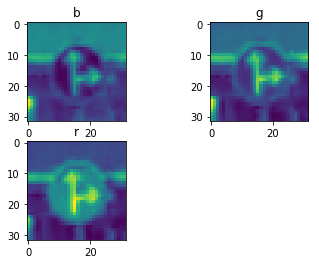

X_train.shape (34799, 32, 32, 3)
X_train[900].shape =  (32, 32, 3)


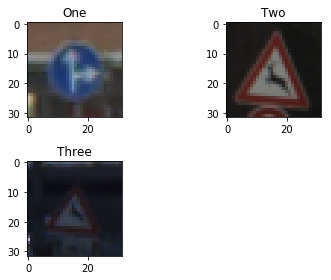

signs =  [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42]
classes = [ 9960  2220 31439  5370  6810 12360 21450 23730 15870 11040 17130  8580
 27329 21810 29219 29909  5010 30449 20370  6630 25950 25680  4500  1770
 10800 33449  1230 10350 26849 10560 25020   210 10140 26250 20010 18930
   900  4830 14010 25410  4200     0  9750]
counts =  [ 180 1980 2010 1260 1770 1650  360 1290 1260 1320 1800 1170 1890 1920  690
  540  360  990 1080  180  300  270  330  450  240 1350  540  210  480  240
  390  690  210  599  360 1080  330  180 1860  270  300  210  210]
0 .Speed limit (20km/h)
cl =  9960
c =  180
10030


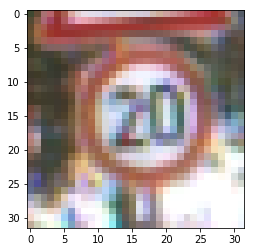

1 .Speed limit (30km/h)
cl =  2220
c =  1980
3728


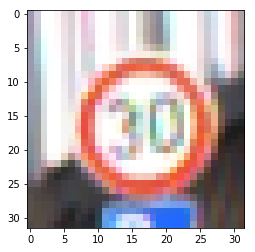

2 .Speed limit (50km/h)
cl =  31439
c =  2010
32784


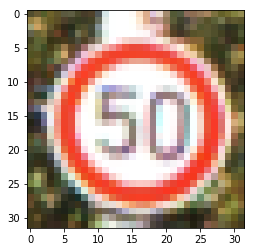

3 .Speed limit (60km/h)
cl =  5370
c =  1260
6145


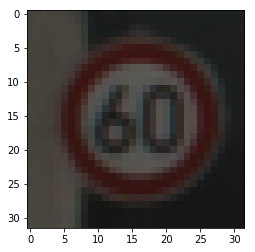

4 .Speed limit (70km/h)
cl =  6810
c =  1770
8295


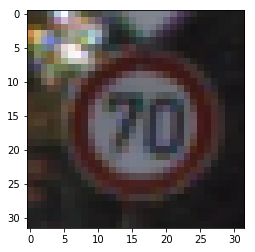

5 .Speed limit (80km/h)
cl =  12360
c =  1650
13634


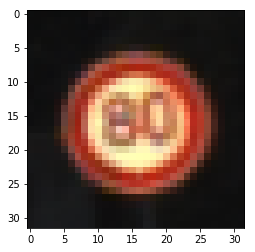

6 .End of speed limit (80km/h)
cl =  21450
c =  360
21480


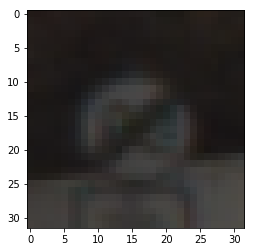

7 .Speed limit (100km/h)
cl =  23730
c =  1290
24956


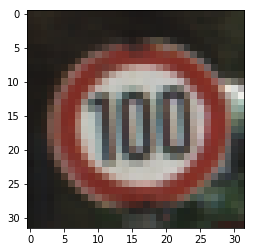

8 .Speed limit (120km/h)
cl =  15870
c =  1260
16678


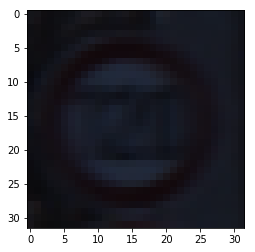

9 .No passing
cl =  11040
c =  1320
11185


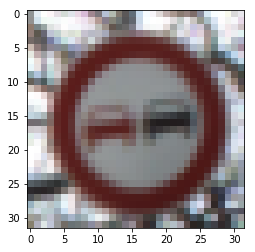

10 .No passing for vehicles over 3.5 metric tons
cl =  17130
c =  1800
17946


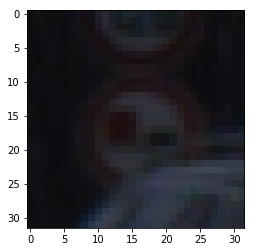

11 .Right-of-way at the next intersection
cl =  8580
c =  1170
9576


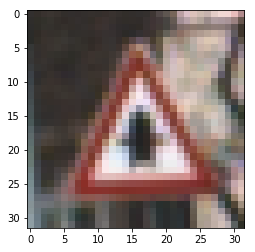

12 .Priority road
cl =  27329
c =  1890
28750


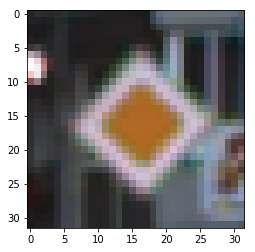

13 .Yield
cl =  21810
c =  1920
22565


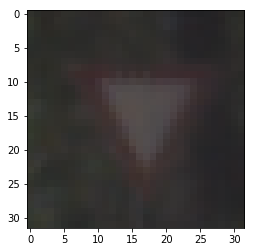

14 .Stop
cl =  29219
c =  690
29694


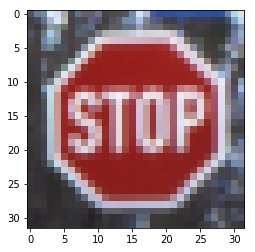

15 .No vehicles
cl =  29909
c =  540
29936


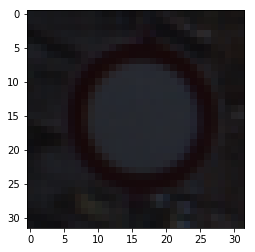

16 .Vehicles over 3.5 metric tons prohibited
cl =  5010
c =  360
5095


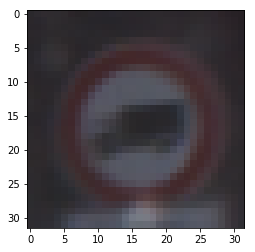

17 .No entry
cl =  30449
c =  990
30505


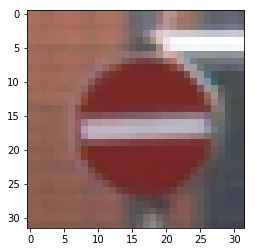

18 .General caution
cl =  20370
c =  1080
20991


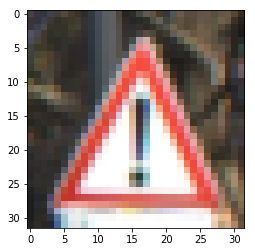

19 .Dangerous curve to the left
cl =  6630
c =  180
6666


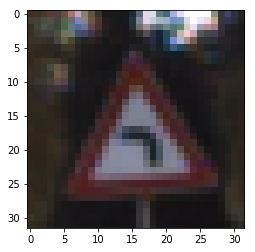

20 .Dangerous curve to the right
cl =  25950
c =  300
26242


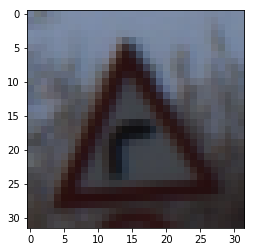

21 .Double curve
cl =  25680
c =  270
25785


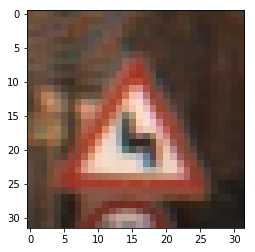

22 .Bumpy road
cl =  4500
c =  330
4784


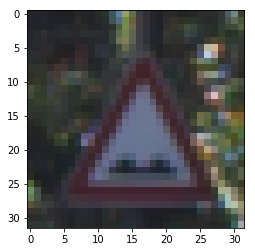

23 .Slippery road
cl =  1770
c =  450
1860


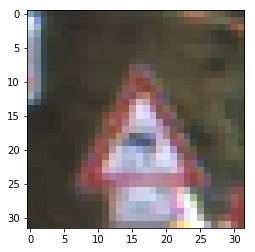

24 .Road narrows on the right
cl =  10800
c =  240
10906


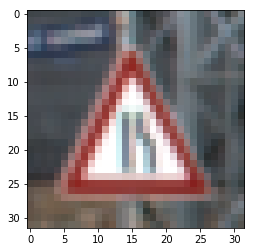

25 .Road work
cl =  33449
c =  1350
34688


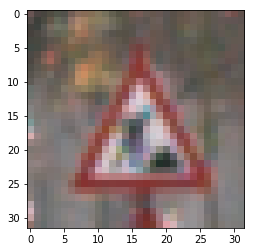

26 .Traffic signals
cl =  1230
c =  540
1561


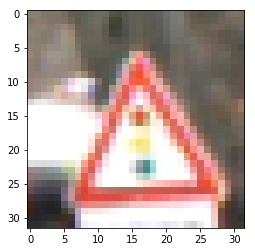

27 .Pedestrians
cl =  10350
c =  210
10435


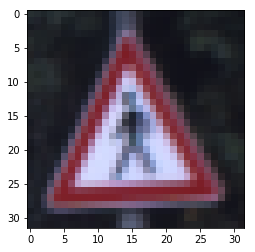

28 .Children crossing
cl =  26849
c =  480
27074


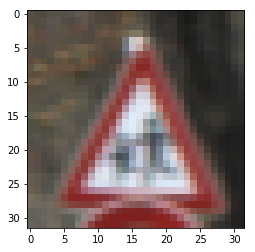

29 .Bicycles crossing
cl =  10560
c =  240
10667


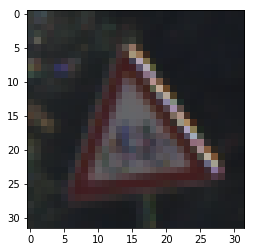

30 .Beware of ice/snow
cl =  25020
c =  390
25296


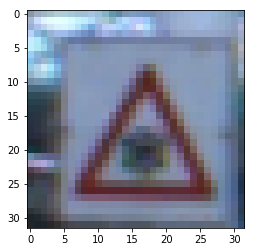

31 .Wild animals crossing
cl =  210
c =  690
315


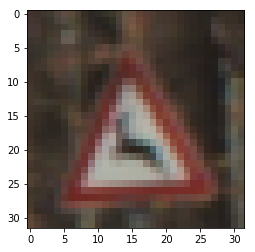

32 .End of all speed and passing limits
cl =  10140
c =  210
10224


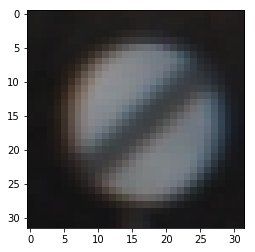

33 .Turn right ahead
cl =  26250
c =  599
26524


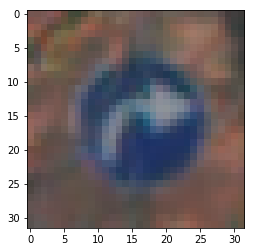

34 .Turn left ahead
cl =  20010
c =  360
20135


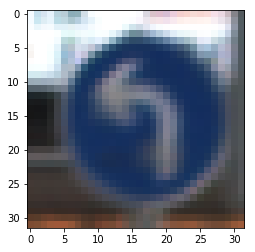

35 .Ahead only
cl =  18930
c =  1080
19425


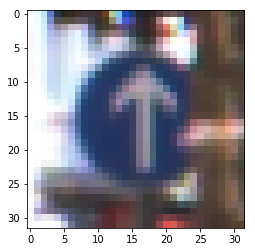

36 .Go straight or right
cl =  900
c =  330
939


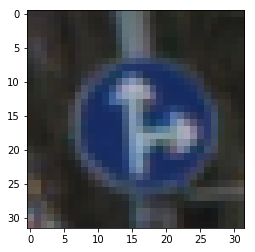

37 .Go straight or left
cl =  4830
c =  180
4889


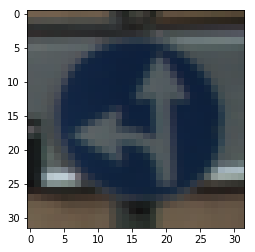

38 .Keep right
cl =  14010
c =  1860
15079


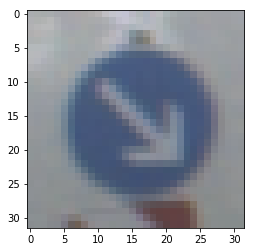

39 .Keep left
cl =  25410
c =  270
25450


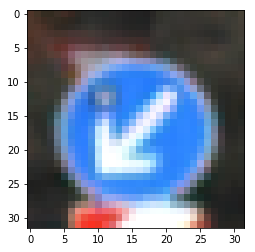

40 .Roundabout mandatory
cl =  4200
c =  300
4288


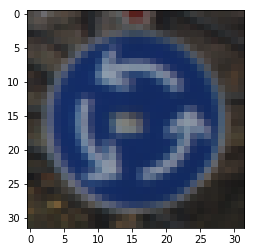

41 .End of no passing
cl =  0
c =  210
30


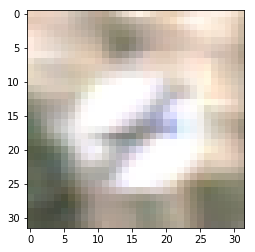

42 .End of no passing by vehicles over 3.5 metric tons
cl =  9750
c =  210
9936


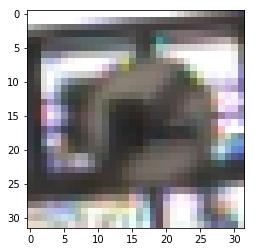

In [23]:
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.

import random
from pandas.io.parsers import read_csv
import cv2
import matplotlib as mping
import matplotlib.image as mping
from sklearn.utils import shuffle

# Visualizations will be shown in the notebook.
%matplotlib inline
print ("image shape = ", image_shape)

random_image = 0
grid_size = 4,2
for row in range(0,4):
    for column in range(0,2):
        plt.subplot2grid(grid_size, (row,column), rowspan = 1, colspan = 1)
        random_image += 100
        image = X_train[random_image].squeeze()
        plt.tight_layout()    
        plt.imshow(image)
    
# experimenting with breaking out individal R,G,B images from one RGB image
b, g, r = cv2.split(X_train[900])
print("b.shape =",b.shape)
fig = plt.figure()
fig.add_subplot(2,2,1)
plt.title("b")
plt.imshow(b)

fig.add_subplot(2,2,2)
plt.title("g")
plt.imshow(g)

fig.add_subplot(2,2,3)
plt.title("r")
plt.imshow(r)
plt.show()






# plt.figure.add_subplot works better. Will use it instead of subplot2grid which has baffling arguments
print("X_train.shape",X_train.shape)
print("X_train[900].shape = ",X_train[900].shape)
fig = plt.figure()
fig.add_subplot(2,2,1)
plt.title("One")
plt.imshow(X_train[900])


fig.add_subplot(2,2,2)
plt.title("Two")
plt.imshow(X_train[800])

fig.add_subplot(2,2,3)
plt.title("Three")
plt.imshow(X_train[700])
plt.tight_layout()
plt.show()

signs, classes, counts = np.unique(Y_train, return_index = True, return_counts = True)
print("signs = ",signs)
print("classes =",classes)
print("counts = ",counts)

sign_names = read_csv("signnames.csv").values[:,1]

for s, cl, c in zip(signs, classes, counts):
    print(s,".%s" %(sign_names[s]))
    random_image = random.randrange(cl,cl + c,1)
    print("cl = ",cl)
    print("c = ",c)
    print(random_image)
    image = X_train[random_image]
    plt.imshow(X_train[random_image])
    plt.show()
    
    


----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

There are various aspects to consider when thinking about this problem:

- Neural network architecture
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

**NOTE:** The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play!

### Pre-process the Data Set (normalization, grayscale, etc.)

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

1. I started out using LeNet architecture. This required changing the (32,32,3) image to (32,32,1). Thus, I converted the color images to grey scale. The literature I found on this strongly suggested normalizing the data once converted to gray scale. Some examples are printed below.


x =  34799


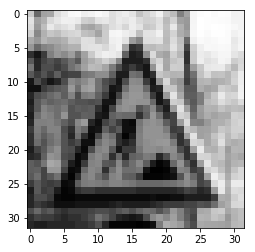

test three
x =  12630


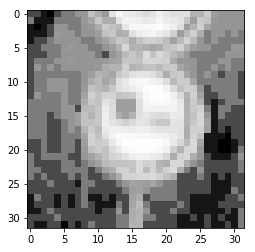

test three
x =  4410


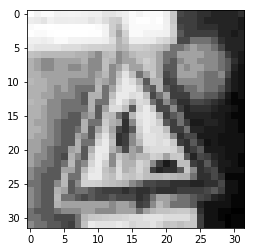

test three
X_train_gray =  (34799, 32, 32, 1)
X_train_norm =  (34799, 32, 32, 1)
X_train_gray.shape = (34799, 32, 32, 1)
X_test_gray.shape = (12630, 32, 32, 1)
X_train_norm.shape = (34799, 32, 32, 1)
X_test_norm.shape = (12630, 32, 32, 1)
X_train_norm.shape =  (34799, 32, 32, 1)
X_train_norm[900].shape =  (32, 32, 1)


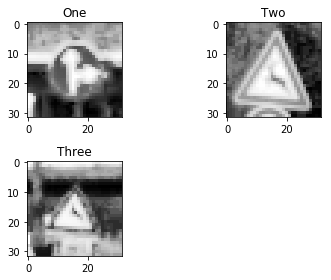

X_train_norm[900].shape =  (32, 32, 1)


In [24]:
#Grey scale generation cell
import cv2
# below is a modified example from image processing website 

# convert images from RGB to Grayscale one at a time
def RGB_2_GRAY(image_array):
    gray = cv2.cvtColor(image_array, cv2.COLOR_BGR2GRAY)
    # the line below takes too long to compute unfortunately 
    #mping.imsave('gray.jpg', gray,cmap='gray')
    equal_gray = cv2.equalizeHist(gray)
    return equal_gray
#Normalize the grayscale images
def normalize_gray_image(image):
    a = 0.1
    b = 0.9
    greyscale_min = 0
    greyscale_max = 255.
    return a + (image - greyscale_min)*(b - a)/( greyscale_max - greyscale_min ) 
    #commenting ot line below while testing new algorithm
    #out = (image/255.) - .5
    
    #return out

def preprocess(data):
    gray_images = []
    x = 0
    for image in data:
        x = x + 1
        gray = RGB_2_GRAY(image)
        gray_images.append(gray)
        
    print("x = ",x)
    plt.imshow(gray, cmap = 'gray')
    plt.show()
    print("test three")
    
    return np.array(gray_images)

from numpy import newaxis


# Iterate through grayscale
X_train_gray = preprocess(X_train)
X_train_gray = X_train_gray[..., newaxis]

X_test_gray = preprocess(X_test)
X_test_gray = X_test_gray[..., newaxis]

X_valid_gray = preprocess(X_valid)
X_valid_gray = X_valid_gray[..., newaxis]

print("X_train_gray = ",X_train_gray.shape )

# Normalization
X_train_norm = normalize_gray_image(X_train_gray)
X_test_norm = normalize_gray_image(X_test_gray)
X_valid_norm = normalize_gray_image(X_valid_gray)

print("X_train_norm = ",X_train_norm.shape)
#print the shape of the new image
print("X_train_gray.shape =", X_train_gray.shape)
print("X_test_gray.shape =", X_test_gray.shape)
print("X_train_norm.shape =", X_train_norm.shape)
print("X_test_norm.shape =", X_test_norm.shape)
print("X_train_norm.shape = ",X_train_norm.shape)
print("X_train_norm[900].shape = ",X_train_norm[900].shape)

#REMEMBER to use .squeeze() to get the (32,32,1) array readable as a (32,32) array

fig = plt.figure()
fig.add_subplot(2,2,1)
plt.title("One")
plt.imshow(X_train_gray[900].squeeze(),cmap='gray')


fig.add_subplot(2,2,2)
plt.title("Two")
plt.imshow(X_train_norm[800].squeeze(),cmap='gray')

fig.add_subplot(2,2,3)
plt.title("Three")
plt.imshow(X_train_norm[700].squeeze(),cmap='gray')
plt.tight_layout()
plt.show()
print("X_train_norm[900].shape = ",X_train_norm[900].shape)


1.5.After converting the data to gray scale I wondered what would happen if I striped out the red, green, and blue components of the color file. This would create three data sets meeting the (32,32,1) requirement for LeNet. The code is below. In the gray scale data I normalized it using a built in cv2 function. I see no similar function for red, green, and blue. So I am trying these three cases with no normalization.

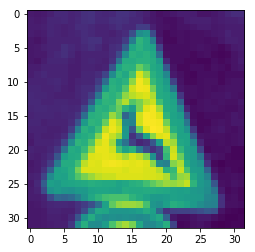

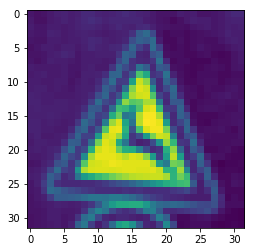

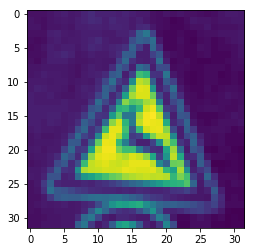

x =  34799


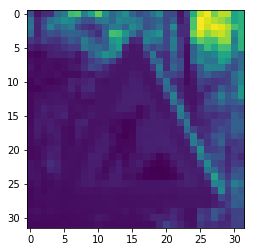

test blue
x =  12630


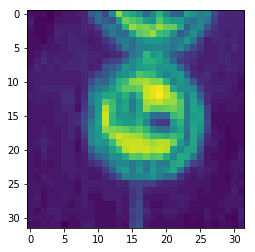

test blue
x =  4410


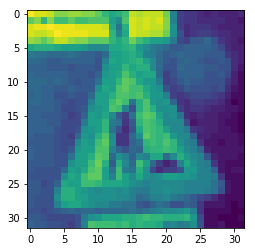

test blue
X_train_blue =  (34799, 32, 32, 1)
x =  34799


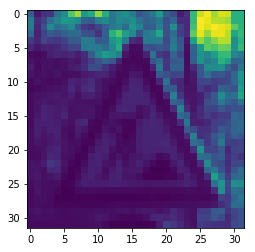

test green
x =  12630


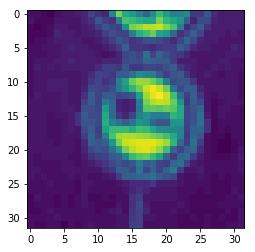

test green
x =  4410


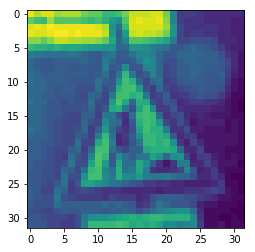

test green
X_train_green =  (34799, 32, 32, 1)
x =  34799


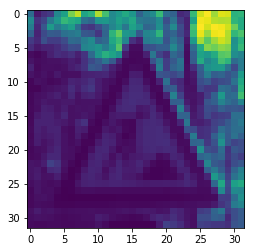

test red
x =  12630


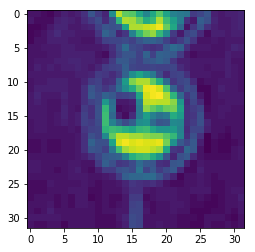

test red
x =  4410


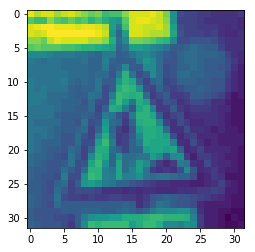

test red
X_train_red =  (34799, 32, 32, 1)


In [25]:
im = X_train[800][:,:,0]
plt.imshow(im)
plt.show()

im = X_train[800][:,:,1]
plt.imshow(im)
plt.show()

im = X_train[800][:,:,2]
plt.imshow(im)
plt.show()
import cv2
# below is a modified example from image processing website 

# convert images from RGB to Grayscale one at a time
def RGB_2_Blue(image_array):
    blue = image_array[:,:,0]

    #equal_blue = cv2.equalizeHist(blue)
    equal_blue = blue
    return equal_blue

def RGB_2_Green(image_array):
    green = image_array[:,:,1]

    #equal_green = cv2.equalizeHist(green)
    equal_green = green
    return equal_green

def RGB_2_Red(image_array):
    red = image_array[:,:,2]

    #equal_red = cv2.equalizeHist(red)
    equal_red = red
    return equal_red


def preprocess_blue(data):
    blue_images = []
    x = 0
    for image in data:
        x = x + 1
        blue = RGB_2_Blue(image)
        blue_images.append(blue)
        
    print("x = ",x)
    plt.imshow(blue)
    plt.show()
    print("test blue")  
    return np.array(blue_images)

def preprocess_green(data):
    green_images = []
    x = 0
    for image in data:
        x = x + 1
        green = RGB_2_Green(image)
        green_images.append(green)
        
    print("x = ",x)
    plt.imshow(green)
    plt.show()
    print("test green")  
    return np.array(green_images)

def preprocess_red(data):
    red_images = []
    x = 0
    for image in data:
        x = x + 1
        red = RGB_2_Red(image)
        red_images.append(red)
        
    print("x = ",x)
    plt.imshow(red)
    plt.show()
    print("test red")  
    return np.array(red_images)

from numpy import newaxis

# Iterate through blue scale
X_train_blue = preprocess_blue(X_train)
X_train_blue = X_train_blue[..., newaxis]

X_test_blue = preprocess_blue(X_test)
X_test_blue = X_test_blue[..., newaxis]

X_valid_blue = preprocess_blue(X_valid)
X_valid_blue = X_valid_blue[..., newaxis]

print("X_train_blue = ",X_train_blue.shape )
               
               
                       
# Iterate through green scale
X_train_green = preprocess_green(X_train)
X_train_green = X_train_green[..., newaxis]

X_test_green = preprocess_green(X_test)
X_test_green = X_test_green[..., newaxis]

X_valid_green = preprocess_green(X_valid)
X_valid_green = X_valid_green[..., newaxis]

print("X_train_green = ",X_train_green.shape )

# Iterate through red scale
X_train_red = preprocess_red(X_train)
X_train_red = X_train_red[..., newaxis]

X_test_red = preprocess_red(X_test)
X_test_red = X_test_red[..., newaxis]

X_valid_red = preprocess_red(X_valid)
X_valid_red = X_valid_red[..., newaxis]

print("X_train_red = ",X_train_red.shape )





### Model Architecture

2.LeNet was used in a prior lesson so I started with it here. Later I converted it to Sermanet-LeNet after reading one of the recommended papers. I was interested in two parts of the paper. One was splitting the data into two parts; one following the entire path and the second skipping several steps and remerging. The other part was a comment in the paper claiming that Sermant-LeNet was, in part, reverse engineered from cat and monkey visual cortexes. How cool is that?

Layers of Sermanet-LeNet

input 32,32,1 image
convolution 1 output 28x28x6
activation one
pooling 1 output 14x14x6
convolution 2 output 10x10x16
activation 2
pooling 2 output 5x5x16
convolution 2B output 1x1x400
activation 3
flatten output of pooling 2 to output of 400
flatten output of convolution 2B to output of 400
concatenate the prior two outputs producting an output of 800
truncate 800 to 43


In [26]:
### Define your architecture here.
### Feel free to use as many code cells as needed.


#starting with straight copy of LeNet from my LeNet solution in LeNet-Lab


import tensorflow as tf
from sklearn.utils import shuffle


EPOCHS = 20
BATCH_SIZE = 2048
keep_prob = tf.placeholder(tf.float32)

from tensorflow.contrib.layers import flatten

def LeNet(x):    
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.1
    
    # TODO: Layer 1: Convolutional. Input = 32x32x1. Output = 28x28x6.
    # Why 5,5,1,6 ? From input h and w to output h  and w equation. 1 and 6 are input and output depths
    conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 1, 6), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(6))
    x =  tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID')   
    conv1   = tf.nn.bias_add(x,conv1_b)

    # TODO: Activation #1
    conv1 = tf.nn.relu(conv1)

    # TODO: Pooling. Input = 28x28x6. Output = 14x14x6.
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
    layer2pooling = conv1 # to save original conv1 value
    #print(" layer2pooling.shape = ", layer2pooling.get_shape())
    #print(" conv1.shape = ", conv1.get_shape())
    
    # TODO: Layer 2: Convolutional. Output = 10x10x16.
    conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 6, 16), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(16))
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b
    conv2 = tf.nn.bias_add(conv2, conv2_b)

    # TODO: Activation.
    conv2 = tf.nn.relu(conv2)
    
    # TODO: Pooling. Input = 10x10x16. Output = 5x5x16.
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
    layer3pooling = conv2 #to retain original value of conv2
    
    # TODO: Layer 2B: Convolutional. Output = 1x1x400
    conv2B_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 16, 400), mean = mu, stddev = sigma), name = 'Conv2B_W')
    conv3 = tf.nn.conv2d(conv2, conv2B_W, strides=[1, 1, 1, 1], padding='VALID')
    conv2B_b = tf.Variable(tf.zeros(400),name = 'conv2B_b') 
    conv3 = tf.nn.bias_add(conv3, conv2B_b)
    
    #another activation
    conv3 = tf.nn.relu(conv3)
    third_layer = conv3 # to preserve value of conv3
    
    #flatten 5x5x16 to 400
    layer2flat = flatten(layer3pooling)
    #print(" layer2flat.shape = ", layer2flat.get_shape())
    
    #flatten 1x1x400
    layer3flat = flatten(conv3)
    #print(" layer3flat.shape = ", layer3flat.get_shape())
    
    #concatenate layer2flat and layer3flat 800 out
    z = tf.concat([layer3flat,layer2flat],1)
    #print("z.shape = ",z.get_shape())
    
    # TODO: Layer 5: Fully Connected. Input = 800. Output = 43.
    fc3_W  = tf.Variable(tf.truncated_normal(shape=(800, 43), mean = mu, stddev = sigma))
    fc3_b  = tf.Variable(tf.zeros(43))
    #print("fc3_W.shape = ",fc3_W.get_shape())
    logits = tf.add(tf.matmul(z, fc3_W), fc3_b)
    #print ("logits = ",logits)
    
    return logits

### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

3.Again I used the code structure found in the prior lesson. This includes the AdamOptimizer. As I found out if the AdamOptimizer if left out (a typo error on my part). This leads to quite poor performance.
  A major modification was to change my tensorflow kernel to tensorflow-gpu. This cut run times into less than a quarter of what they were before.

In [27]:
x = tf.placeholder(tf.float32, (None, 32, 32, 1))
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, 43)


In [28]:
rate = 0.001

logits = LeNet(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits = logits, labels = one_hot_y)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

In [29]:
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
   
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y,keep_prob: 1.0})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

My training, testing, and validation sets are listed below. 
  The best training set accuracy was 93.6% and validation was 91.4% this was with the normalized gray scale images. The best test set accuracy was only 86.1%%. This was probalby due to the low number of training images on many of the 43 classes. This could have been improved by generating more data. 
  My results are included in comments in the code organized by case, epochs, and batch size. The red, green, and blue cases were not normalized as discussed prior. I have included an un-normalized gray case for comparison purposes. The most interesting result is that the green case consistintly beat the un-normalized gray scale case. If I had more time, I would write code to normalize the green case and see if it would beat gray scale. 

In [30]:
X_train_norm, Y_train = shuffle(X_train_norm, Y_train)
#X_train_blue, Y_train = shuffle(X_train_blue, Y_train)
#X_train_green, Y_train = shuffle(X_train_green, Y_train)
#X_train_red, Y_train = shuffle(X_train_red, Y_train)

#X_train_gray, Y_train = shuffle(X_train_gray, Y_train)
# Gray case not normalized
#X_train_case = X_train_gray  # 40 Epochs Batch size 128  Validation Accuracy 81.6% Validation Accuracy 77.3% 
#X_test_case  = X_test_gray   # 10 Epochs Batch size 1024 Validation Accuracy 62.8% Validation Accuracy 60.7%
#X_valid_case = X_valid_gray  # 20 Epochs Batch size 2048 Validation Accuracy 70.7% Validation Accuracy 70.1%


# Gray case
X_train_case = X_train_norm  # 40 Epochs Batch size 128  Training Accuracy 93.6% Validation Accuracy 91.4% 
X_test_case  = X_test_norm   # 10 Epochs Batch size 1024 Training Accuracy 87.1% Validation Accuracy 91.4%
X_valid_case = X_valid_norm  # 20 Epochs Batch size 2048 Training Accuracy 87.7% Validation Accuracy 85.6%

# Blue case
#X_train_case = X_train_blue   # 40 Epochs Batch size 128  Training Accuracy 87.3% Validation Accuracy 86.5% 
#X_test_case  = X_test_blue    # 10 Epochs Batch size 1024 Training Accuracy 76.9% Validation Accuracy 76.4%
#X_valid_case = X_valid_blue   # 20 Epochs Batch size 2048 Training Accuracy 77.3% Validation Accuracy 78.6%

# Green case
#X_train_case = X_train_green   # 40 Epochs Batch size 128  Training Accuracy 90.7%  Validation Accuracy 87.5% 
#X_test_case  = X_test_green    # 10 Epochs Batch size 1024 Training Accuracy 82.5% Validation Accuracy 81.7%
#X_valid_case = X_valid_green   # 20 Epochs Batch size 2048 Training Accuracy 77.0% Validation Accuracy 75.4%

# Red case   
#X_train_case = X_train_red     #40 Epochs Batch size 128  Training Accuracy 86.0%  Validation Accuracy 83.6%
#X_test_case  = X_test_red      #10 Epochs Batch size 1024 Training Accuracy 76.5%  Validation Accuracy
#X_valid_case = X_valid_red     #20 Epochs Batch size 2048 Training Accuracy 79.7%  Validation Accuracy 71.6%
#                               100 Epochs Batch size 128  Training Accuracy 86.8% but reaches this by epoch 25

X_train_case, Y_train = shuffle(X_train_case, Y_train)

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    
    num_examples = len(X_train_case)
    print("num_examples = ",num_examples)
    print("Training...")
    print()
    for i in range(EPOCHS):
        X_train_case, Y_train = shuffle(X_train_case, Y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train_case[offset:end], Y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: 0.7})
            
        validation_accuracy = evaluate(X_valid_case, Y_valid)
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
        
    saver.save(sess, './traffic_sign')
    print("Model saved")

num_examples =  34799
Training...

EPOCH 1 ...
Validation Accuracy = 0.216

EPOCH 2 ...
Validation Accuracy = 0.358

EPOCH 3 ...
Validation Accuracy = 0.500

EPOCH 4 ...
Validation Accuracy = 0.628

EPOCH 5 ...
Validation Accuracy = 0.693

EPOCH 6 ...
Validation Accuracy = 0.744

EPOCH 7 ...
Validation Accuracy = 0.781

EPOCH 8 ...
Validation Accuracy = 0.805

EPOCH 9 ...
Validation Accuracy = 0.827

EPOCH 10 ...
Validation Accuracy = 0.834

EPOCH 11 ...
Validation Accuracy = 0.841

EPOCH 12 ...
Validation Accuracy = 0.844

EPOCH 13 ...
Validation Accuracy = 0.856

EPOCH 14 ...
Validation Accuracy = 0.862

EPOCH 15 ...
Validation Accuracy = 0.868

EPOCH 16 ...
Validation Accuracy = 0.871

EPOCH 17 ...
Validation Accuracy = 0.873

EPOCH 18 ...
Validation Accuracy = 0.876

EPOCH 19 ...
Validation Accuracy = 0.883

EPOCH 20 ...
Validation Accuracy = 0.883

Model saved


In [31]:
# Testing cell
import tensorflow as tf
saver = tf.train.Saver()
with tf.Session() as sess:
    #saver.restore(sess, tf.train.latest_checkpoint('.'))
    saver.restore(sess, './traffic_sign')
    test_accuracy = evaluate(X_test_case, Y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

Test Accuracy = 0.861


---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

I chose 9 random traffic sign images from the web. They are displayed below. The last one (keep right) might have caused problems as resizing the image 'squished' it to a small extent.

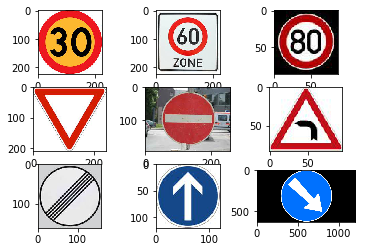

In [43]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
%matplotlib inline

image1=mpimg.imread('30kph.jpg')
plt.subplot(3,3,1)
plt.imshow(image1)

image2=mpimg.imread('60kph.jpg')
plt.subplot(3,3,2)
plt.imshow(image2)

image3=mpimg.imread('80kph.jpg')
plt.subplot(3,3,3)
plt.imshow(image3)

image4=mpimg.imread('yield.jpg')
plt.subplot(3,3,4)
plt.imshow(image4)

image5=mpimg.imread('no_entry.jpg')
plt.subplot(3,3,5)
plt.imshow(image5)

image6=mpimg.imread('dangerous_curve_left.jpg')
plt.subplot(3,3,6)
plt.imshow(image6)

image7=mpimg.imread('end_of_restrictions.jpg')
plt.subplot(3,3,7)
plt.imshow(image7)

image8=mpimg.imread('ahead_only.jpg')
plt.subplot(3,3,8)
plt.imshow(image8)

image9=mpimg.imread('keep_right.jpg')
plt.subplot(3,3,9)
plt.imshow(image9)

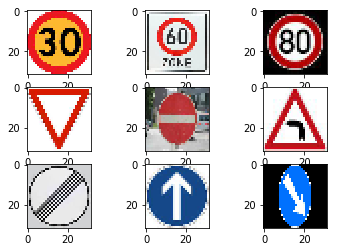

In [44]:


image1 = cv2.resize(image1, (32, 32))
image2 = cv2.resize(image2, (32, 32))
image3 = cv2.resize(image3, (32, 32))
image4 = cv2.resize(image4, (32, 32))
image5 = cv2.resize(image5, (32, 32))
image6 = cv2.resize(image6, (32, 32))
image7 = cv2.resize(image7, (32, 32))
image8 = cv2.resize(image8, (32, 32))
image9 = cv2.resize(image9, (32, 32))

correct_label=[1,3,5,13,17,19,32,35,38]

plt.subplot(3,3,1)
plt.imshow(image1)

plt.subplot(3,3,2)
plt.imshow(image2)

plt.subplot(3,3,3)
plt.imshow(image3)

plt.subplot(3,3,4)
plt.imshow(image4)

plt.subplot(3,3,5)
plt.imshow(image5)

plt.subplot(3,3,6)
plt.imshow(image6)

plt.subplot(3,3,7)
plt.imshow(image7)

plt.subplot(3,3,8)
plt.imshow(image8)

plt.subplot(3,3,9)
plt.imshow(image9)

### Predict the Sign Type for Each Image

I found 9 images on the web from our list of 43. They are followed by their label number below:
1. 30kph label 1
2. 60kph label 3
3. 80kph label 5
4. yield label 13
5. no entry label 17
6. dangerous curve to left label 19
7. end restrictions label 32
8. ahead only label 35
9. keep right 38

x =  9


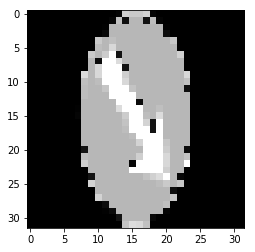

test three


In [45]:
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.
### Feel free to use as many code cells as needed.
web_images = np.array([image1,image2,image3,image4,image5,image6,image7,image8,image9])

web_images = preprocess(web_images)
web_images = web_images[..., newaxis]

web_images = normalize_gray_image(web_images)
#print(web_images.shape)

### Analyze Performance

The model's prediction of these nine samples is poor. It ranged around 67%. I suspect this could have been improved by generating more training data for the cases with small sample sets. 

In [46]:
# Testing cell
import tensorflow as tf
print(correct_label)
saver = tf.train.Saver()
with tf.Session() as sess:
    #saver.restore(sess, tf.train.latest_checkpoint('.'))
    saver.restore(sess, './traffic_sign')
    test_accuracy = evaluate(web_images, correct_label)
    print("Test Accuracy = {:.3f}".format(test_accuracy))



[1, 3, 5, 13, 17, 19, 32, 35, 38]
Test Accuracy = 0.667


In [47]:
### Calculate the accuracy for these 5 new images. 
### For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate on these new images.
prediction = tf.nn.softmax(logits)
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    web_images_class = sess.run(prediction, feed_dict={x: web_images, keep_prob : 1.0})
    predicts = sess.run(tf.nn.top_k(web_images_class, k=5, sorted=True))
    
for i in range(len(predicts[0])):
    predict_label = np.argmax(web_images_class[i])
    print('Image', i, 'prediction:',  predict_label, ', the true label is', correct_label[i],'.')

Image 0 prediction: 6 , the true label is 1 .
Image 1 prediction: 40 , the true label is 3 .
Image 2 prediction: 2 , the true label is 5 .
Image 3 prediction: 13 , the true label is 13 .
Image 4 prediction: 17 , the true label is 17 .
Image 5 prediction: 19 , the true label is 19 .
Image 6 prediction: 32 , the true label is 32 .
Image 7 prediction: 35 , the true label is 35 .
Image 8 prediction: 38 , the true label is 38 .


### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tk.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

The softmax probabliities are odd. Some of the cases like the first image that were completely wrong. My code predicted  the wrong answer with a 92% probability of being right. Other guesses were wrong but with negligable confidence. Image 2 that had a confidence of only 19%. 

Softmax makes the low performance more enlightening. The six signs it got right were all with fairly high degrees of certainty. The three it got wrong range from a certainty of 19% to 92%. Why? All three that it got wrong are speed limits. They all look similar to start with. They are all a big red circle with some numbers in the middle. Those numbers are taking up only a small percentage of the pixels. Ergo, a future version of this code should include a much larger sample set of speed limit signs.

In [48]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 
### Feel free to use as many code cells as needed.
with tf.Session() as sess:
    predicts = sess.run(tf.nn.top_k(web_images_class, k=5, sorted=True))
    



for i in range(len(predicts[0])):
    print('Image', i, 'probabilities:', predicts[0][i], 'and predicted classes:', predicts[1][i])

Image 0 probabilities: [ 0.91908073  0.02531441  0.02029704  0.01761468  0.00783517] and predicted classes: [ 6  1  0  2 40]
Image 1 probabilities: [ 0.93148237  0.04488469  0.0044268   0.00441034  0.00368545] and predicted classes: [40 38 12  0  8]
Image 2 probabilities: [ 0.19315511  0.17259546  0.17225441  0.15336105  0.1330933 ] and predicted classes: [ 2 11  5 21  1]
Image 3 probabilities: [  9.99929428e-01   7.05646744e-05   6.99232339e-11   3.02865372e-11
   2.53651093e-12] and predicted classes: [13 35 34 38 36]
Image 4 probabilities: [  9.99859333e-01   1.37165815e-04   3.25671385e-06   1.37411504e-07
   9.39359950e-08] and predicted classes: [17 14 33 38 34]
Image 5 probabilities: [  9.74434018e-01   2.28323303e-02   1.70595688e-03   7.05362065e-04
   2.78178952e-04] and predicted classes: [19 31 23 21 10]
Image 6 probabilities: [  8.84979486e-01   1.04786411e-01   6.87979534e-03   1.51550630e-03
   7.64633820e-04] and predicted classes: [32  6 41 42 12]
Image 7 probabilities

---

## Step 4: Visualize the Neural Network's State with Test Images

 This Section is not required to complete but acts as an additional excersise for understaning the output of a neural network's weights. While neural networks can be a great learning device they are often referred to as a black box. We can understand what the weights of a neural network look like better by plotting their feature maps. After successfully training your neural network you can see what it's feature maps look like by plotting the output of the network's weight layers in response to a test stimuli image. From these plotted feature maps, it's possible to see what characteristics of an image the network finds interesting. For a sign, maybe the inner network feature maps react with high activation to the sign's boundary outline or to the contrast in the sign's painted symbol.

 Provided for you below is the function code that allows you to get the visualization output of any tensorflow weight layer you want. The inputs to the function should be a stimuli image, one used during training or a new one you provided, and then the tensorflow variable name that represents the layer's state during the training process, for instance if you wanted to see what the [LeNet lab's](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) feature maps looked like for it's second convolutional layer you could enter conv2 as the tf_activation variable.

For an example of what feature map outputs look like, check out NVIDIA's results in their paper [End-to-End Deep Learning for Self-Driving Cars](https://devblogs.nvidia.com/parallelforall/deep-learning-self-driving-cars/) in the section Visualization of internal CNN State. NVIDIA was able to show that their network's inner weights had high activations to road boundary lines by comparing feature maps from an image with a clear path to one without. Try experimenting with a similar test to show that your trained network's weights are looking for interesting features, whether it's looking at differences in feature maps from images with or without a sign, or even what feature maps look like in a trained network vs a completely untrained one on the same sign image.

<figure>
 <img src="visualize_cnn.png" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your output should look something like this (above)</p> 
 </figcaption>
</figure>
 <p></p> 


In [ ]:
### Visualize your network's feature maps here.
### Feel free to use as many code cells as needed.

# image_input: the test image being fed into the network to produce the feature maps
# tf_activation: should be a tf variable name used during your training procedure that represents the calculated state of a specific weight layer
# activation_min/max: can be used to view the activation contrast in more detail, by default matplot sets min and max to the actual min and max values of the output
# plt_num: used to plot out multiple different weight feature map sets on the same block, just extend the plt number for each new feature map entry

def outputFeatureMap(image_input, tf_activation, activation_min=-1, activation_max=-1 ,plt_num=1):
    # Here make sure to preprocess your image_input in a way your network expects
    # with size, normalization, ect if needed
    # image_input =
    # Note: x should be the same name as your network's tensorflow data placeholder variable
    # If you get an error tf_activation is not defined it maybe having trouble accessing the variable from inside a function
    activation = tf_activation.eval(session=sess,feed_dict={x : image_input})
    featuremaps = activation.shape[3]
    plt.figure(plt_num, figsize=(15,15))
    for featuremap in range(featuremaps):
        plt.subplot(6,8, featuremap+1) # sets the number of feature maps to show on each row and column
        plt.title('FeatureMap ' + str(featuremap)) # displays the feature map number
        if activation_min != -1 & activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin =activation_min, vmax=activation_max, cmap="gray")
        elif activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmax=activation_max, cmap="gray")
        elif activation_min !=-1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin=activation_min, cmap="gray")
        else:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", cmap="gray")

### Question 9

Discuss how you used the visual output of your trained network's feature maps to show that it had learned to look for interesting characteristics in traffic sign images


**Answer:**

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 